# Exercise 3

__Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona__


*    For the arriving airport, you can use the Destination column in the searches file.

*    Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

*   Bonus point: Solving this problem using pandas (instead of any other approach).


In [15]:
import pandas as pd
import bz2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

Remember which were the paths

In [2]:
path_searches_bz2 = '/home/dsc/Data/challenge/searches.csv.bz2'
path_bookings_bz2 = '//home/dsc/Data/challenge/bookings.csv.bz2'

path_searches_sample_bz2 = '/home/dsc/DS_challenge/DS_challenge/searches_sample.csv.bz2'
path_bookings_sample_bz2 = '/home/dsc/DS_challenge/DS_challenge/bookings_sample.csv.bz2'

path_bookings_clear = '/home/dsc/DS_challenge/DS_challenge/bookings_clear.csv.bz2'


In [79]:
searches_sample = pd.read_csv(path_searches_sample_bz2,
                       compression = 'bz2', sep = '^')

In [34]:
searches_sample.shape

(9999, 45)

In [35]:
searches_sample.columns.tolist()

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [36]:
searches_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               9999 non-null   object
 1   Time               9999 non-null   object
 2   TxnCode            9999 non-null   object
 3   OfficeID           9999 non-null   object
 4   Country            9999 non-null   object
 5   Origin             9999 non-null   object
 6   Destination        9999 non-null   object
 7   RoundTrip          9999 non-null   int64 
 8   NbSegments         9999 non-null   int64 
 9   Seg1Departure      9999 non-null   object
 10  Seg1Arrival        9999 non-null   object
 11  Seg1Date           9972 non-null   object
 12  Seg1Carrier        4047 non-null   object
 13  Seg1BookingCode    1143 non-null   object
 14  Seg2Departure      7195 non-null   object
 15  Seg2Arrival        7195 non-null   object
 16  Seg2Date           7160 non-null   object


In [37]:
searches_sample.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
9873,2013-01-10,06:23:45,MPT,abad92d5dd1f2cea8748bb2013a92ccb,GB,LON,PEK,0,1,LON,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LON
1871,2013-01-02,06:23:11,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,LAS,HAJ,0,1,LAS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
2852,2013-01-03,03:02:47,FQD,bf3c5bc5bb8f6afa1f89fc8756bb949b,US,TWF,FMN,1,2,TWF,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,DCA
6652,2013-01-07,22:42:02,FXR,a3ab256abb78596dad0f7a49091a9829,GB,LHR,EWR,1,2,LHR,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,c0337ed02da9bca1b1e30eb9e044c911,LON
6523,2013-01-07,23:08:02,MPT,302aef1c1e3bc13d2bd744b41678e500,IT,MIL,LIS,0,1,MIL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ROM


Note that date format is given by yyyy-mm-dd

In [40]:
df.columns

Index(['Date', 'Destination'], dtype='object')

Let's now think about NaNs and Duplicates:

__Removing NaNs__

From https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf we can import a quick function that outputs a dataframe that tells you how many missing values and their percentages in each column:

In [26]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, sort=True, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [41]:
df_NA = assess_NA(searches_sample)
df_NA

,Number of NA,Percent NA
From,75,0.75
Seg1BookingCode,8856,88.57
Seg1Carrier,5952,59.53
Seg1Date,27,0.27
Seg2Arrival,2804,28.04
Seg2BookingCode,9001,90.02
Seg2Carrier,7129,71.30
Seg2Date,2839,28.39
Seg2Departure,2804,28.04
Seg3Arrival,9465,94.66


The data is full of NaNs with many columns with more than 90 %, so in case of working with those columns it might be recommended to drop all these cases.


Since we only need here the Date & Destination columns (specifically BCN, MAD, AGP), we won't modify nothing for now.

In [78]:
#DataFrame with the columns Date and Destination containing MAD, BCN, AGP

df = searches_sample[['Date', 'Destination']].copy()
df = df[df['Destination'].isin(['MAD', 'BCN', 'AGP'])].copy()

df.head(10)



,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
165,2013-01-01,BCN
177,2013-01-01,BCN
186,2013-01-01,BCN
188,2013-01-01,BCN
208,2013-01-01,BCN


__Removing duplicates__

As the previous exercise, the number of duplicates can be huge in this type of files, so it will be a good practice to assess the value and extension.

Working with only the selected columns (optimizes the process), we explore the data and eliminate duplicates using chunks.

In [114]:
reader = pd.read_csv(
    path_searches_bz2,
    sep='^', low_memory = False,
    chunksize=100000, usecols = ['Date', 'Time', 'Origin', 'Destination',])

# blank dataframe
df_total = pd.DataFrame()


# chunks loop
for k, chunk in tqdm(enumerate(reader)):
    # drop duplicates
    columns = ['Date', 'Time', 'Origin', 'Destination']
    dd = chunk.drop_duplicates(subset=columns)
    # append each grouped chunk
    df_total = df_total.append(dd, ignore_index=True)
    # total drop duplicates
    df_total = df_total.drop_duplicates(subset = columns)
    print(len(df_total))
    
    if k == 10:
        break





0it [00:00, ?it/s]



1it [00:00,  1.23it/s]

100000






2it [00:01,  1.19it/s]

199998






3it [00:02,  1.14it/s]

299997






4it [00:03,  1.09it/s]

358996






5it [00:04,  1.03it/s]

358996






6it [00:05,  1.00s/it]

358996






7it [00:06,  1.03it/s]

358996






8it [00:08,  1.06s/it]

358996






9it [00:08,  1.02s/it]

358996






10it [00:10,  1.03s/it]

358996
358996


We see that when 358,996 is reached, the number of unique rows is the same.

Then we will assume that there is only 358,996 unique rows in the file.

In [115]:
df_total.to_csv('./searches_clear.csv.bz2', sep='^',
                index = False, compression='bz2')

In [116]:
path_searches_clear = '/home/dsc/DS_challenge/DS_challenge/searches_clear.csv.bz2'

In [117]:
df = pd.read_csv(path_searches_clear, sep='^')

In [118]:
df.head()

,Date,Time,Origin,Destination
0,2013-01-01,20:25:57,TXL,AUH
1,2013-01-01,10:15:33,ATH,MIL
2,2013-01-01,18:04:49,ICT,SFO
3,2013-01-01,17:42:40,RNB,ARN
4,2013-01-01,17:48:29,OSL,MAD


In [119]:
df.shape

(358996, 4)

We repeat the process for the Destinations we want

Now we need to select and slice the date 

In [120]:
df['Date_YM'] = df['Date'].str[:7]

In [121]:
#DataFrame with the columns Date and Destination containing MAD, BCN, AGP

df_new = df[df['Destination'].isin(['MAD', 'BCN', 'AGP'])].copy()


df_new.head(10)

,Date,Time,Origin,Destination,Date_YM
4,2013-01-01,17:48:29,OSL,MAD,2013-01
93,2013-01-01,20:15:57,FRA,AGP,2013-01
113,2013-01-01,23:40:53,ALC,BCN,2013-01
147,2013-01-01,15:35:53,HHN,AGP,2013-01
151,2013-01-01,10:46:21,FRA,MAD,2013-01
165,2013-01-01,03:40:25,SFO,BCN,2013-01
177,2013-01-01,11:26:34,MOW,BCN,2013-01
186,2013-01-01,09:46:07,CPH,BCN,2013-01
188,2013-01-01,02:07:17,NDR,BCN,2013-01
208,2013-01-01,15:58:35,CGN,BCN,2013-01


Group by Date and Destination

In [122]:
df_new = df_new.groupby(['Date_YM', 'Destination'])['Destination'].agg(['count']).reset_index()
df_new.rename(columns = {'count': 'flights'}, inplace = True)
df_new.head(10)

,Date_YM,Destination,flights
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,145


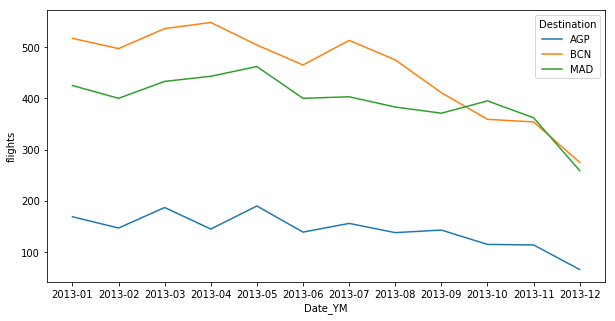

In [126]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data=df_new, x='Date_YM', y='flights', hue='Destination');